## Kaggle Python public API for data collection : Notebook Classification TASK

In [2]:
DATA_PATH_KEYWORDS = '../data/search_keywords.csv'
DATA_PATH_NOTEBOOKS = '../data/'

Importing librairies

In [3]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np

In [4]:
api = KaggleApi()
api.authenticate()

Read the file containing the search keywords used to retrieve notebooks 

In [5]:
keywords_df = pd.DataFrame(columns=['Category', 'Subcategory'])
keywords_df = pd.read_csv(DATA_PATH_KEYWORDS, sep=';') 
keywords_df

,subcategory,category
0,linear regression,regression
1,lasso regression,regression
2,randomforestregression,regression
3,ridge regression,regression
4,XGBRegressor,regression
...,...,...
89,sarsa,reinforcement learning
90,ddpg,reinforcement learning
91,qlearning,reinforcement learning
92,markov decision,reinforcement learning


The following function returns the category of a Notebook based on its subcategory

In [5]:
def search(sub,data):
    for i in data.index:
        if data.loc[i]['subcategory'] == sub:
            return data.loc[i]['category']

# List of notebooks

In [14]:
df = pd.DataFrame(columns=['title','subcategory','category'])


Building a notebook titles dataframe with category and subcategory

In [15]:
for keyword in keywords_df['subcategory']:
    for i in range(1,11):
        try :
                kernels = api.kernels_list(search = keyword, page=i)
                for kernel in kernels:
                    # print(kernel.ref)
                    df.loc[len(df)]=[kernel.ref,keyword,search(keyword,keywords_df)]
        except Exception as e:
            print('Kaggle API exception : "', kernel.ref, '" Notebook not found')

Kaggle API exception : " amolambkar/multivariate-linear-regression-using-python-code " Notebook not found
Kaggle API exception : " fabiendaniel/predicting-flight-delays-tutorial " Notebook not found
Kaggle API exception : " fabiendaniel/predicting-flight-delays-tutorial " Notebook not found
Kaggle API exception : " fabiendaniel/predicting-flight-delays-tutorial " Notebook not found
Kaggle API exception : " vassylkorzh/crime-scale-prediction " Notebook not found
Kaggle API exception : " juliojaavier/earth-surface-temperature " Notebook not found
Kaggle API exception : " juliojaavier/earth-surface-temperature " Notebook not found
Kaggle API exception : " juliojaavier/earth-surface-temperature " Notebook not found
Kaggle API exception : " rbyron/simple-linear-regression-models " Notebook not found
Kaggle API exception : " rbyron/simple-linear-regression-models " Notebook not found
Kaggle API exception : " rbyron/simple-linear-regression-models " Notebook not found
Kaggle API exception : "

In [16]:
df

,title,subcategory,category
0,sudhirnl7/linear-regression-tutorial,linear regression,regression
1,goyalshalini93/car-price-prediction-linear-reg...,linear regression,regression
2,divan0/multiple-linear-regression,linear regression,regression
3,anthonypino/price-analysis-and-linear-regression,linear regression,regression
4,vivinbarath/simple-linear-regression-for-salar...,linear regression,regression
...,...,...,...
10458,fanbyprinciple/reinforcement-learning-on-opena...,reinforcement,reinforcement learning
10459,alexisbcook/exercise-one-step-lookahead,reinforcement,reinforcement learning
10460,alexisbcook/exercise-interactive-maps,reinforcement,reinforcement learning
10461,lbarbosa/connectx-deep-reinforcement-learning,reinforcement,reinforcement learning


In [17]:
api.kernels_list(search = 'Halite IV - DQN example - PyTorch')[0].ref

'hsperr/halite-iv-dqn-example-pytorch'

In [18]:
df.head(10), df.shape

(                                               title        subcategory  \
 0               sudhirnl7/linear-regression-tutorial  linear regression   
 1  goyalshalini93/car-price-prediction-linear-reg...  linear regression   
 2                  divan0/multiple-linear-regression  linear regression   
 3   anthonypino/price-analysis-and-linear-regression  linear regression   
 4  vivinbarath/simple-linear-regression-for-salar...  linear regression   
 5                 foxtreme/linear-regression-project  linear regression   
 6  aakashns/pytorch-basics-linear-regression-from...  linear regression   
 7  nitindatta/fifa-in-depth-analysis-with-linear-...  linear regression   
 8   ashydv/sales-prediction-simple-linear-regression  linear regression   
 9                       aminizahra/linear-regression  linear regression   
 
      category  
 0  regression  
 1  regression  
 2  regression  
 3  regression  
 4  regression  
 5  regression  
 6  regression  
 7  regression  
 8  regre

Saving the dataframe to a .csv

In [19]:
df.to_csv(DATA_PATH_NOTEBOOKS+'ntb_list.csv')

In [20]:
means = (df.category.value_counts() / len(df)) * 100

meansdf = pd.DataFrame(columns=['category', 'means'])
meansdf.category = means.index
meansdf.means = means.values

meansdf

,category,means
0,computer vision,25.269999
1,nlp,24.553187
2,clustering,17.385071
3,regression,14.479595
4,classification,11.468986
5,reinforcement learning,5.505113
6,clusterings,1.338048


<AxesSubplot:xlabel='category', ylabel='means'>

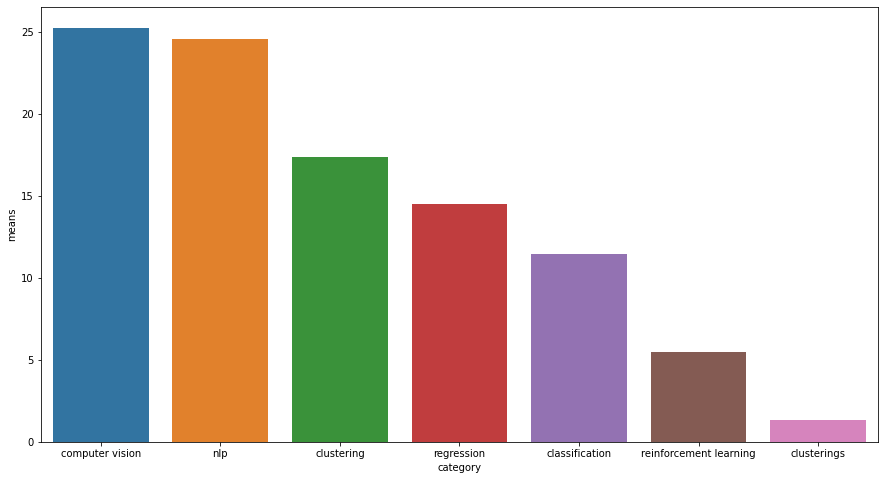

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
sns.barplot(x='category', y='means', data=meansdf)


### Before collecting
- Delete duplicate notebooks : print duplicate categories => choose best category to keep
- Delete notebooks with non-english titles

In [22]:
df = pd.read_csv(DATA_PATH_NOTEBOOKS+'ntb_list.csv', sep=',', encoding='utf-8', index_col=0)
df.head()

,title,subcategory,category
0,sudhirnl7/linear-regression-tutorial,linear regression,regression
1,goyalshalini93/car-price-prediction-linear-reg...,linear regression,regression
2,divan0/multiple-linear-regression,linear regression,regression
3,anthonypino/price-analysis-and-linear-regression,linear regression,regression
4,vivinbarath/simple-linear-regression-for-salar...,linear regression,regression


In [23]:
df.shape

(10463, 3)

In [24]:
# a dict with duplicate titles and their respective positions in the df
duplicates = df[df.duplicated('title', keep=False)].groupby('title').groups

In [25]:
def flatten_list(l):
    return [item for sublist in l for item in sublist]

In [26]:
import collections

def to_be_dropped_indices(dictionary):
    to_be_dropped = [] # indices to be dropped from original df
    temp = []

    for k,v in dictionary.items():
        duplicates_df = df[df.index.isin(v.values)]
        
        # if the rows have the same category, they are all dropped except the last one
        if len(set(list(duplicates_df.category))) == 1:
            to_be_dropped.append(list(duplicates_df.index[:len(duplicates_df.category)-1]))

        else: 
            # drop least common category duplicates for a notebook
            dup_counter = collections.Counter(duplicates_df.category)
            most_common = dup_counter.most_common()[0][0]
            most_common_i = duplicates_df.index.where(duplicates_df.category == most_common).dropna()[0]

            to_be_dropped.append(duplicates_df.index.where(duplicates_df.index != most_common_i).dropna())

    return flatten_list(to_be_dropped)

Getting indices of rows to be dropped (duplicates)

In [27]:
to_be_dropped = to_be_dropped_indices(duplicates)
len(to_be_dropped), to_be_dropped[:10]

(1866, [951, 7211.0, 2983, 3555, 2819, 3342, 3606, 3802, 3944, 4069])

Dropping duplicates

In [28]:
df_clean = df.copy()
df_clean.drop(to_be_dropped, inplace=True)
print(df_clean.shape)

(8597, 3)


#### Removing non-english titles

In [29]:
# tokenize keywords
def list_to_unique_words(list):
    unique_words = []
    for l in list:
        unique_words.append(str(l).lower().split())

    return flatten_list(unique_words)

Update the default *nltk* words list to add our categories and subcategories and other custom words that are domain specific to avoid them being removed

In [30]:
lower_categ = list_to_unique_words(list(keywords_df.category))
lower_subcateg = list_to_unique_words(list(keywords_df.subcategory))
custom_list = ['dataset', 'datasets', 'feature', 'transformer', 'transformers', 'using', 'detect', 'detecting', 'machine', 'intro', 'pca', 'connectx', 'xgboost', 'visualising', 'visualizing', 'gaussian', 'bayesian', 'score', 'scores', 'map', 'maps', 'ml', 'dl', 'algorithm', 'algorithms', 'feature', 'features']

In [31]:
import nltk
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [32]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [36]:
# nltk.download('words')

words = set(nltk.corpus.words.words())

words.update(lower_categ)
words.update(lower_subcateg)
words.update(custom_list)

# exepected non-english indices : 353 1594 1640 1584 1664 4412 8273 11540 1081 1715 1642 4693 5320 7295 10615 11629

In [37]:
def clean_non_english(df, word_list):
    non_english = []
    for row in df.index:
        
        title = df.loc[row, 'title']
        try:
            # print(df.loc[row, 'title'])
            # title = "Chaii EDA&Baseline 実況"
            clean_title = " ".join(w for w in nltk.wordpunct_tokenize(title) \
                    if w.lower() in word_list or not w.isalpha())

            if ((len(title.split()) - len(clean_title.split())) > 3) or len(clean_title.split()) == 0: 
                non_english.append(row) # builds list of titles with low # of english words
        except Exception as e:
            print(e)
    return non_english

In [38]:
non_english = clean_non_english(df_clean, words)
non_english[:5]

[]

We manually detect few titles of notebooks not written in english 

In [39]:
detected_non_english = [353, 1594, 1640, 1584, 1664, 4412, 8273, 11540, 1081, 1715, 1642, 4693, 5320, 7295, 10615, 11629]

In [40]:
non_english_to_be_dropped = intersection(non_english, detected_non_english)
non_english_to_be_dropped

[]

In [41]:
df_clean.drop(non_english_to_be_dropped, inplace=True)

In [42]:
df_clean.shape

(8597, 3)

Let's now write it the list of notebooks to a .csv file

In [43]:
df_clean.to_csv(DATA_PATH_NOTEBOOKS+'ntb_list_clean.csv')

# Collecting notebooks by category

In [21]:
for i in df_clean.index :
        try :
                api.kernels_pull(df_clean.loc[i]['title'], path = DATA_PATH_NOTEBOOKS + df_clean.loc[i]['category'])
        except Exception as e:
            print('Kaggle API exception : ', kernel.ref, 'Notebook not found')

Kaggle API exception :  onrcan/spectral-clustering Notebook not found
Kaggle API exception :  sujoys/spectral-clustering Notebook not found
Kaggle API exception :  saymasultantufan/k-means-and-birch Notebook not found
Kaggle API exception :  mushfiqurrahmanrifat/assignment-birch-clustering Notebook not found
Kaggle API exception :  vishnumandala/twitter-sentiment-analysis-using-denclue Notebook not found
Kaggle API exception :  bagriaditya/minibatchkmeans Notebook not found
Kaggle API exception :  sarthakmaniar27/kmeans-and-kmedoids Notebook not found
Kaggle API exception :  ashishpatel26/dbscan Notebook not found
